In [11]:
import os
import csv
import boto3

rekognition = boto3.client('rekognition', region_name='us-west-2')

def calculate_head_body_ratio(image_path):
    with open(image_path, 'rb') as image_file:
        image_bytes = image_file.read()

    # Use Rekognition to detect faces and analyze the head
    face_response = rekognition.detect_faces(Image={'Bytes': image_bytes}, Attributes=['ALL'])
    
    # Use Rekognition to detect labels and analyze the body
    body_response = rekognition.detect_labels(Image={'Bytes': image_bytes}, MaxLabels=10)

    head_height = None
    body_height = None

    if 'FaceDetails' in face_response and len(face_response['FaceDetails']) > 0:
        # Assume the first face in the image is the one we need
        face = face_response['FaceDetails'][0]
        # Get the height of the head bounding box
        head_top = face['BoundingBox']['Top']
        head_height = face['BoundingBox']['Height']

    for label in body_response['Labels']:
        if label['Name'] == 'Person':
            if len(label['Instances']) > 0:
                instance = label['Instances'][0]
                # Get the height of the body bounding box
                body_top = instance['BoundingBox']['Top']
                body_height = instance['BoundingBox']['Height']

    if head_height is not None and body_height is not None:
        # Calculate the ratio of head to body height
        head_body_ratio = head_height / body_height
        return head_body_ratio
    else:
        return None

def process_images_in_folder(folder_path, output_csv):
    results = []

    # Iterate through all files in the folder
    for image_name in os.listdir(folder_path):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, image_name)
            try:
                ratio = calculate_head_body_ratio(image_path)
                if ratio is not None:
                    results.append({
                        'Image Name': image_name,
                        'Head-to-Body Height Ratio': ratio
                    })
                    print(f"Processed {image_name}: Ratio = {ratio:.4f}")
                else:
                    print(f"Could not calculate ratio for {image_name}.")
            except Exception as e:
                print(f"Error processing {image_name}: {str(e)}")

    # Write the results to a CSV file
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ['Image Name', 'Head-to-Body Height Ratio']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for result in results:
            writer.writerow(result)

    print(f"Analysis complete, results saved to {output_csv}.")

# Replace 'your_image_folder' with the path to your image folder
# Replace 'output_results.csv' with the path where you want to save the output file
folder_path = 'AIGCimages'
output_csv = 'AIGC_Headbodyratio.csv'

process_images_in_folder(folder_path, output_csv)


Processed 8b54bb87-8ef7-5891-a49d-5fff21d33a20.png: Ratio = 0.3339
Processed 5e4c64df-3907-5a3a-a5dd-7fe6c2839913.png: Ratio = 0.2038


KeyboardInterrupt: 

In [4]:
import pandas as pd
import os

# Read the CSV file
csv_file = 'AIGC_Headbodyratio.csv'  # Replace with your CSV file name
df = pd.read_csv(csv_file)

# Assume the file name is in the "Image Name" column, remove the file extension from the file name
df['image_id'] = df['Image Name'].apply(lambda x: os.path.splitext(x)[0])

# Save the results back to a CSV file
df.to_csv('AIGCHeadbodyratioa.csv', index=False)


In [5]:
import pandas as pd

# Read two CSV files
df1 = pd.read_csv('AIGCHeadbodyratioa.csv')  # Assuming this CSV file contains the relevant data
df2 = pd.read_csv('AIGCnews.csv')  # Assuming this CSV file contains 'section' information

# Merge based on 'image_id' using the merge function
merged_df = pd.merge(df1, df2[['image_id', 'section', 'Gender']], on='image_id', how='left')

# Save the result to a new CSV file, or perform further processing
merged_df.to_csv('AIGC_Headbodyratio.csv', index=False)


In [ ]:
import os
import csv
import boto3

# Initialize the AWS Rekognition client
rekognition = boto3.client('rekognition', region_name='us-west-2')

def calculate_head_body_ratio(image_path):
    with open(image_path, 'rb') as image_file:
        image_bytes = image_file.read()

    # Use Rekognition to detect faces and analyze the head
    face_response = rekognition.detect_faces(Image={'Bytes': image_bytes}, Attributes=['ALL'])
    
    # Use Rekognition to detect labels and analyze the body
    body_response = rekognition.detect_labels(Image={'Bytes': image_bytes}, MaxLabels=10)

    head_height = None
    body_height = None

    if 'FaceDetails' in face_response and len(face_response['FaceDetails']) > 0:
        # Assume the first face detected is the one we need
        face = face_response['FaceDetails'][0]
        # Get the bounding box height of the head
        head_top = face['BoundingBox']['Top']
        head_height = face['BoundingBox']['Height']

    for label in body_response['Labels']:
        if label['Name'] == 'Person':
            if len(label['Instances']) > 0:
                instance = label['Instances'][0]
                # Get the bounding box height of the body
                body_top = instance['BoundingBox']['Top']
                body_height = instance['BoundingBox']['Height']

    if head_height is not None and body_height is not None:
        # Calculate the ratio of head height to body height
        head_body_ratio = head_height / body_height
        return head_body_ratio
    else:
        return None

def process_images_in_folder(folder_path, output_csv):
    results = []

    # Iterate over all files in the folder
    for image_name in os.listdir(folder_path):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, image_name)
            try:
                ratio = calculate_head_body_ratio(image_path)
                if ratio is not None:
                    results.append({
                        'Image Name': image_name,
                        'Head-to-Body Height Ratio': ratio
                    })
                    print(f"Processed {image_name}: Ratio = {ratio:.4f}")
                else:
                    print(f"Could not calculate ratio for {image_name}.")
            except Exception as e:
                print(f"Error processing {image_name}: {str(e)}")

    # Write the results to a CSV file
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ['Image Name', 'Head-to-Body Height Ratio']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for result in results:
            writer.writerow(result)

    print(f"Analysis complete, results saved to {output_csv}.")

# Replace 'your_image_folder' with the path to your image folder
# Replace 'output_results.csv' with the path to the output file
folder_path = 'HMGCimages'
output_csv = 'HMGC_Headbodyratio.csv'

process_images_in_folder(folder_path, output_csv)


In [ ]:
import pandas as pd
import os

# Read the CSV file
csv_file = 'HMGC_Headbodyratio.csv'  # Replace with your CSV file name
df = pd.read_csv(csv_file)

# Remove file extension from the image names
df['image_id'] = df['Image Name'].apply(lambda x: os.path.splitext(x)[0])

# Save the results to a new CSV file
df.to_csv('HMGCHeadbodyratioa.csv', index=False)


In [ ]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('HMGCHeadbodyratioa.csv')  # Replace with your CSV file name
df2 = pd.read_csv('HMGCnews.csv')  # Replace with your CSV file name

# Merge the dataframes based on 'image_id'
merged_df = pd.merge(df1, df2[['image_id', 'section', 'Gender']], on='image_id', how='left')

# Save the merged result to a new CSV file
merged_df.to_csv('HMGC_Headbodyratio.csv', index=False)


In [ ]:
#If you need to confirm the code of the above cell, please contact me, because calling AWS API will incur charges

In [57]:
import pandas as pd

df_ai = pd.read_csv('AIGC_Headbodyratio.csv')


Man_pitch = df_ai[df_ai['Gender'] == 'Man']['Head-to-Body Height Ratio']
Woman_pitch = df_ai[df_ai['Gender'] == 'Woman']['Head-to-Body Height Ratio']

print("Descriptive statistics of men Head-to-Body Height Ratioe：")
print(Man_pitch.describe())

print("Descriptive statistics of women Head-to-Body Height Ratioe：")
print(Woman_pitch.describe())

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Man_pitch, Woman_pitch, equal_var=True)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

Descriptive statistics of men Head-to-Body Height Ratioe：
count    1591.000000
mean        0.340542
std         0.122250
min         0.022081
25%         0.262911
50%         0.324193
75%         0.403011
max         0.988450
Name: Head-to-Body Height Ratio, dtype: float64
Descriptive statistics of women Head-to-Body Height Ratioe：
count    623.000000
mean       0.344393
std        0.101614
min        0.094788
25%        0.282400
50%        0.333923
75%        0.387238
max        0.989957
Name: Head-to-Body Height Ratio, dtype: float64
t-statistic: -0.6974909019555836, p-value: 0.48556893362526843


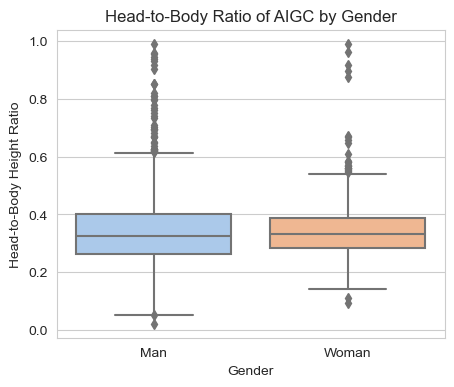

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.boxplot(x='Gender', y='Head-to-Body Height Ratio', data=df_ai, order=['Man', 'Woman'])
plt.title('Head-to-Body Ratio of AIGC by Gender')
plt.xlabel('Gender')
plt.ylabel('Head-to-Body Height Ratio')
plt.show()

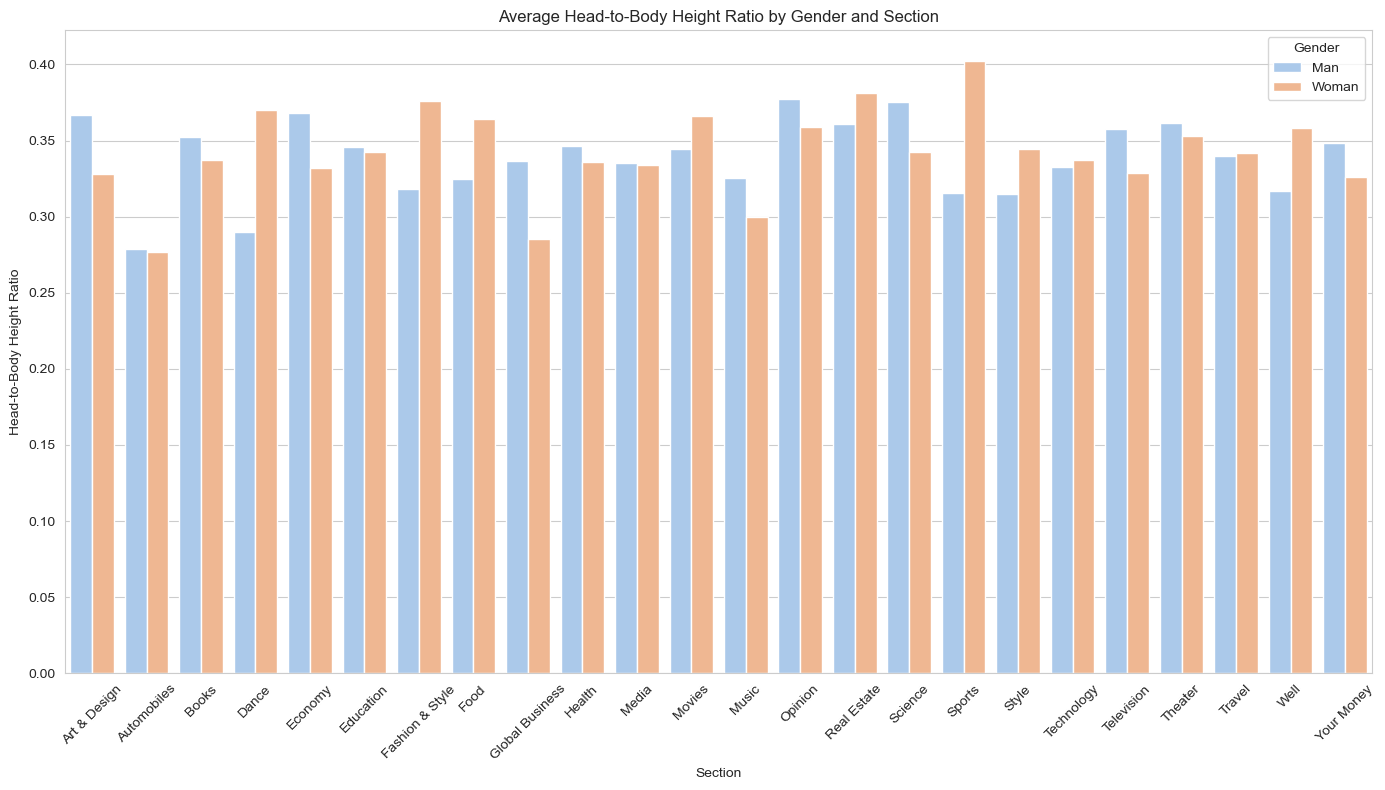

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mean_ratio_ai = df_ai.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='section', y='Head-to-Body Height Ratio', hue='Gender', data=mean_ratio_ai)
plt.title('Average Head-to-Body Height Ratio by Gender and Section')
plt.xticks(rotation=45)
plt.ylabel('Head-to-Body Height Ratio')
plt.xlabel('Section')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


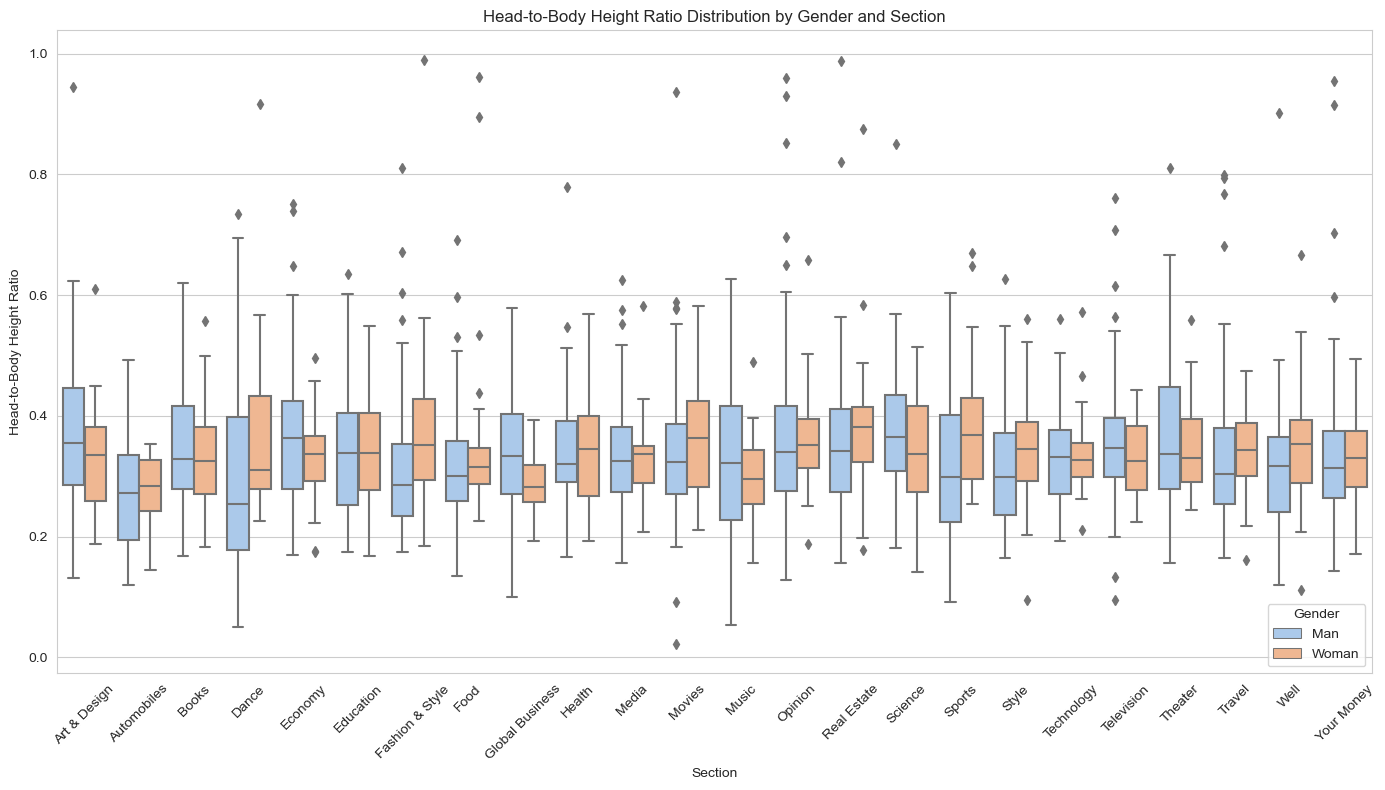

In [72]:
df_ai['section'] = df_ai['section'].astype(str)
df_ai = df_ai.sort_values(by='section')


plt.figure(figsize=(14, 8))
sns.boxplot(x='section', y='Head-to-Body Height Ratio', hue='Gender', data=df_ai, hue_order=['Man', 'Woman'])
plt.title('Head-to-Body Height Ratio Distribution by Gender and Section')
plt.xticks(rotation=45)
plt.ylabel('Head-to-Body Height Ratio')
plt.xlabel('Section')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

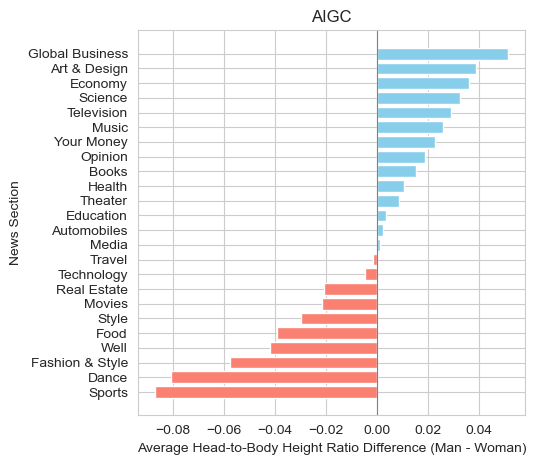

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume 'df' is your DataFrame containing 'section', 'Gender', and 'Head-to-Body Height Ratio' columns

# Step 1: Calculate the average head-to-body height ratio for each gender in each section
mean_ratio_ai = df_ai.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

pivot_df_ai = mean_ratio_ai.pivot(index='section', columns='Gender', values='Head-to-Body Height Ratio')

pivot_df_ai['Difference'] = pivot_df_ai['Man'] - pivot_df_ai['Woman']

# Sort the data for better visual clarity
sorted_df_ai = pivot_df_ai.sort_values('Difference')

# Prepare the plot
sections = sorted_df_ai.index
differences = sorted_df_ai['Difference']

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(5, 5))

colors = ['salmon' if x < 0 else 'skyblue' for x in differences]

plt.barh(sections, differences, color=colors)
plt.axvline(0, color='grey', linewidth=0.8)  # Add a vertical reference line at x=0

plt.title('AIGC')
plt.xlabel('Average Head-to-Body Height Ratio Difference (Man - Woman)')
plt.ylabel('News Section')

plt.show()


In [62]:
import pandas as pd

df_hm = pd.read_csv('HMGC_Headbodyratio.csv')


Man_pitch = df_hm[df_hm['Gender'] == 'Man']['Head-to-Body Height Ratio']
Woman_pitch = df_hm[df_hm['Gender'] == 'Woman']['Head-to-Body Height Ratio']

print("Descriptive statistics of men Head-to-Body Height Ratioe：")
print(Man_pitch.describe())

print("Descriptive statistics of women Head-to-Body Height Ratioe：")
print(Woman_pitch.describe())

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(Man_pitch, Woman_pitch, equal_var=True)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

Descriptive statistics of men Head-to-Body Height Ratioe：
count    1756.000000
mean        0.430671
std         0.208935
min         0.073448
25%         0.267325
50%         0.376427
75%         0.564208
max         0.999572
Name: Head-to-Body Height Ratio, dtype: float64
Descriptive statistics of women Head-to-Body Height Ratioe：
count    461.000000
mean       0.413459
std        0.212252
min        0.102770
25%        0.249645
50%        0.361818
75%        0.521528
max        0.999679
Name: Head-to-Body Height Ratio, dtype: float64
t-statistic: 1.5689523324506214, p-value: 0.11680188047888701


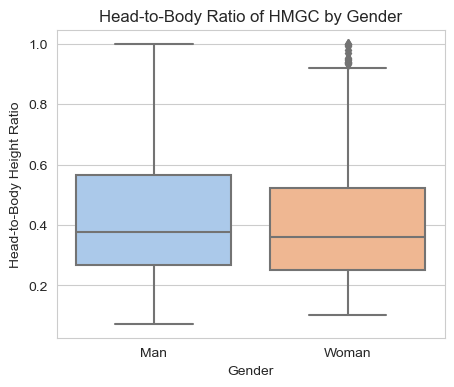

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.boxplot(x='Gender', y='Head-to-Body Height Ratio', data=df_hm)
plt.title('Head-to-Body Ratio of HMGC by Gender')
plt.xlabel('Gender')
plt.ylabel('Head-to-Body Height Ratio')
plt.show()

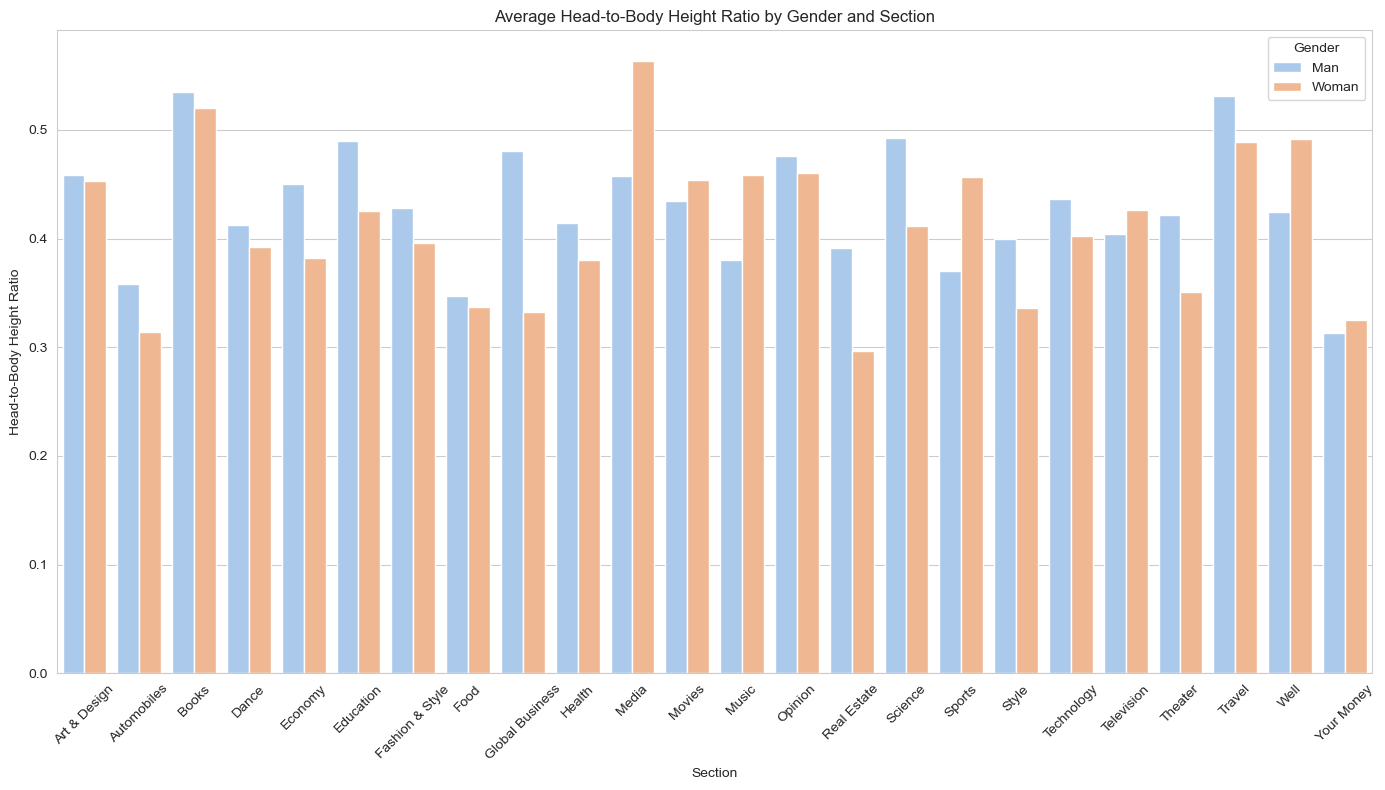

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mean_ratio_hm = df_hm.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='section', y='Head-to-Body Height Ratio', hue='Gender', data=mean_ratio_hm)
plt.title('Average Head-to-Body Height Ratio by Gender and Section')
plt.xticks(rotation=45)
plt.ylabel('Head-to-Body Height Ratio')
plt.xlabel('Section')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

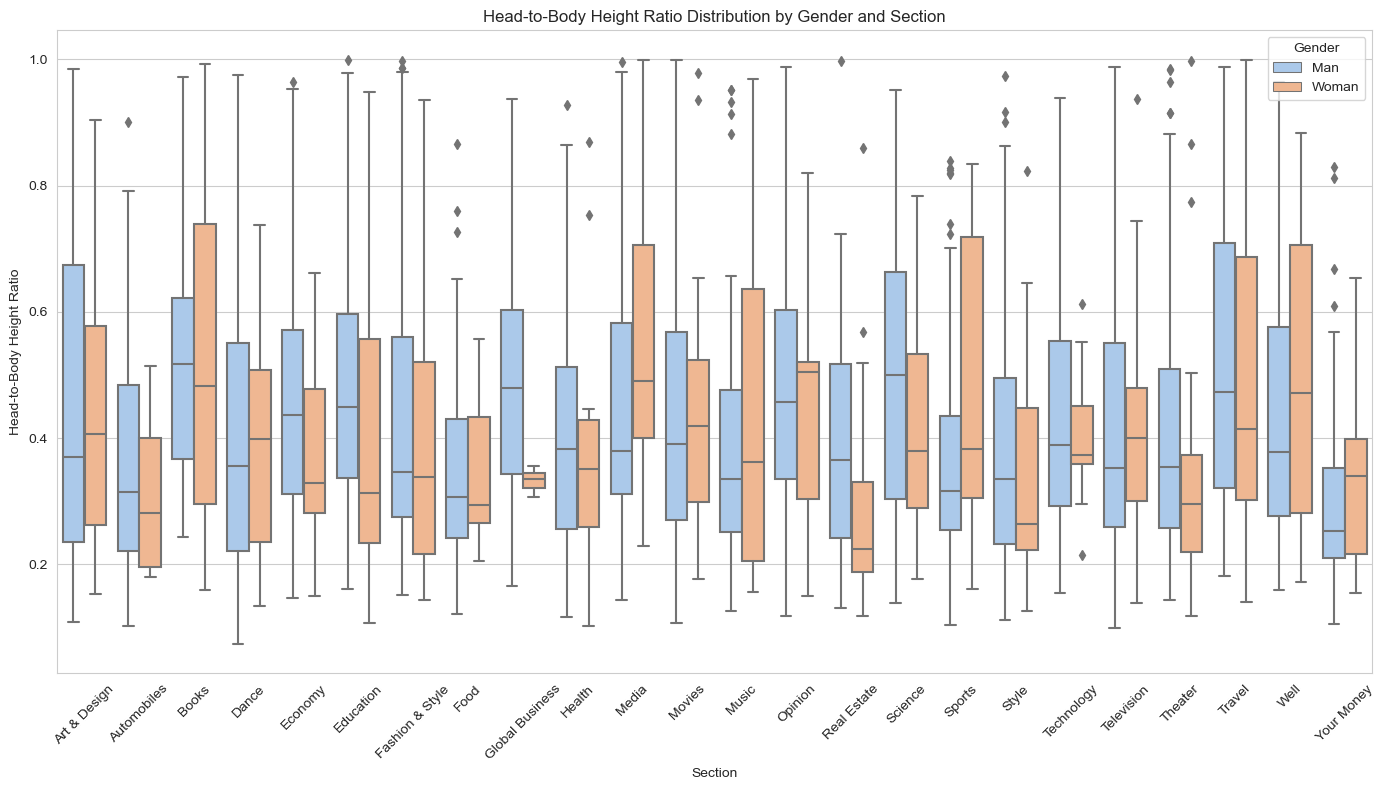

In [65]:
df_hm['section'] = df_hm['section'].astype(str)
df_hm = df_hm.sort_values(by='section')

plt.figure(figsize=(14, 8))
sns.boxplot(x='section', y='Head-to-Body Height Ratio', hue='Gender', data=df_hm)
plt.title('Head-to-Body Height Ratio Distribution by Gender and Section')
plt.xticks(rotation=45)
plt.ylabel('Head-to-Body Height Ratio')
plt.xlabel('Section')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

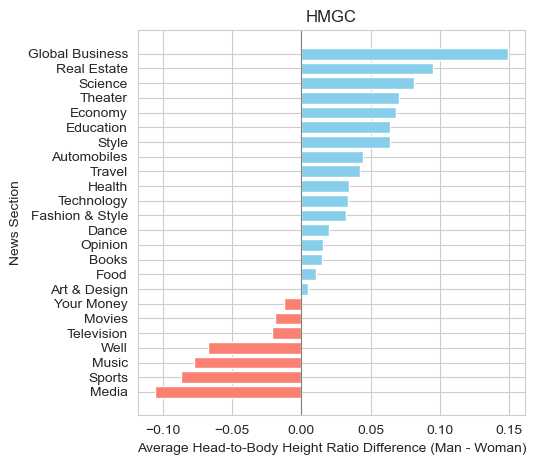

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume 'df' is your DataFrame containing 'section', 'Gender', and 'Head-to-Body Height Ratio' columns

# Step 1: Calculate the average head-to-body height ratio for each gender in each section
mean_ratio_hm = df_hm.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

pivot_df_hm = mean_ratio_hm.pivot(index='section', columns='Gender', values='Head-to-Body Height Ratio')

pivot_df_hm['Difference'] = pivot_df_hm['Man'] - pivot_df_hm['Woman']

# Sort the data for better visual clarity
sorted_df_hm = pivot_df_hm.sort_values('Difference')

# Prepare the plot
sections = sorted_df_hm.index
differences = sorted_df_hm['Difference']

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(5, 5))

colors = ['salmon' if x < 0 else 'skyblue' for x in differences]

plt.barh(sections, differences, color=colors)
plt.axvline(0, color='grey', linewidth=0.8)  # Add a vertical reference line at x=0

plt.title('HMGC')
plt.xlabel('Average Head-to-Body Height Ratio Difference (Man - Woman)')
plt.ylabel('News Section')

plt.show()


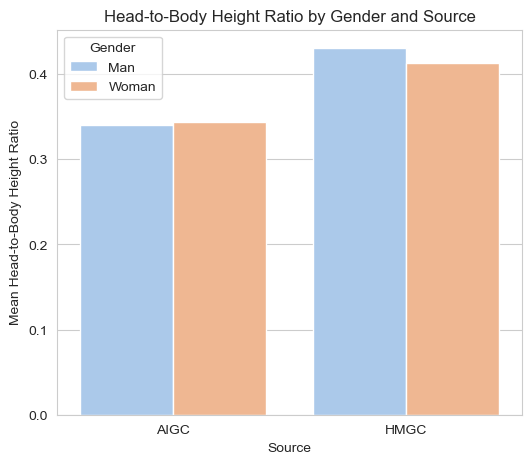

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume you already have DataFrames df_aigc and df_hmgc containing gender and pitch angle data
# and have performed descriptive statistics calculations

# Create new DataFrames to combine AIGC and HMGC data
df_aigc = pd.DataFrame({
    'Source': 'AIGC',
    'Gender': ['Man'] * len(df_ai[df_ai['Gender'] == 'Man']['Head-to-Body Height Ratio']) +
              ['Woman'] * len(df_ai[df_ai['Gender'] == 'Woman']['Head-to-Body Height Ratio']),
    'Pitch Angle': list(df_ai[df_ai['Gender'] == 'Man']['Head-to-Body Height Ratio']) + 
                   list(df_ai[df_ai['Gender'] == 'Woman']['Head-to-Body Height Ratio'])
})
df_hmgc = pd.DataFrame({
    'Source': 'HMGC',
    'Gender': ['Man'] * len(df_hm[df_hm['Gender'] == 'Man']['Head-to-Body Height Ratio']) +
              ['Woman'] * len(df_hm[df_hm['Gender'] == 'Woman']['Head-to-Body Height Ratio']),
    'Pitch Angle': list(df_hm[df_hm['Gender'] == 'Man']['Head-to-Body Height Ratio']) + 
                   list(df_hm[df_hm['Gender'] == 'Woman']['Head-to-Body Height Ratio'])
})

# Combine the two DataFrames
df_combined = pd.concat([df_aigc, df_hmgc])

sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(6, 5))

# Plot a bar chart
sns.barplot(x='Source', y='Pitch Angle', hue='Gender', data=df_combined, errorbar=None)

# Set the chart title and labels
plt.title('Head-to-Body Height Ratio by Gender and Source')
plt.xlabel('Source')
plt.ylabel('Mean Head-to-Body Height Ratio')

# Display the legend
plt.legend(title='Gender')

# Show the plot
plt.show()


/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


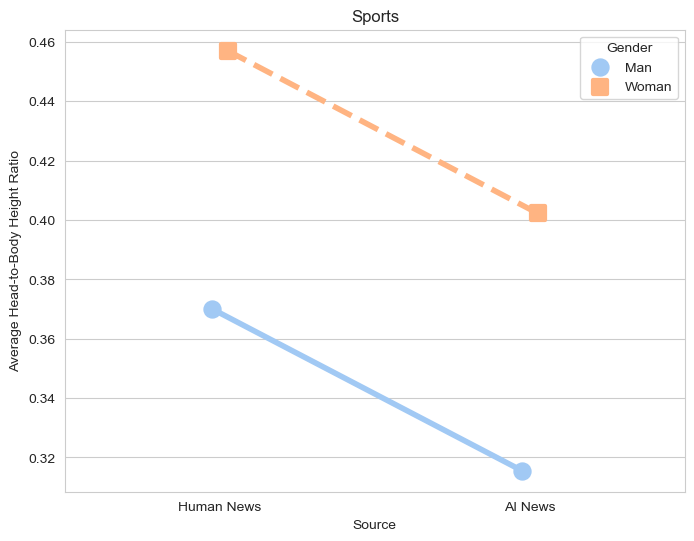

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


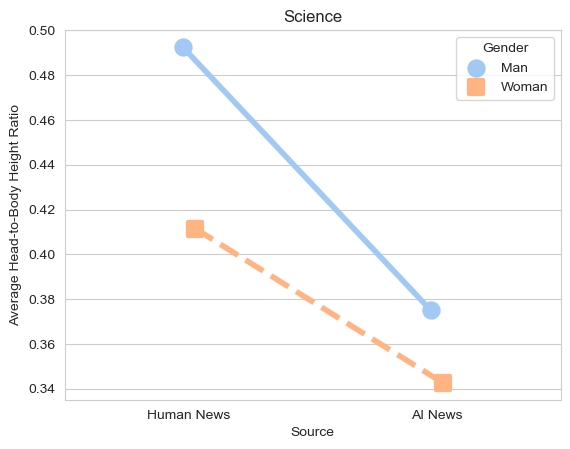

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


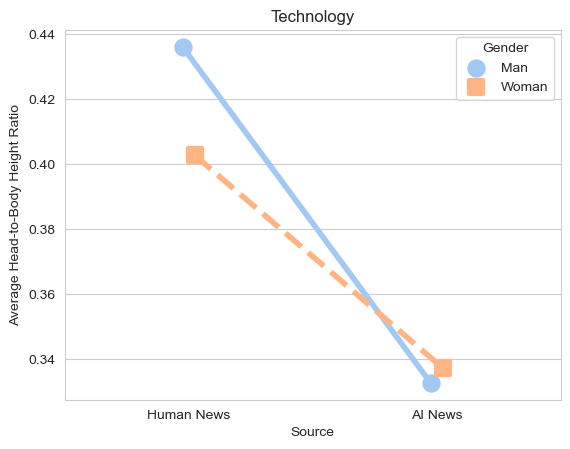

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


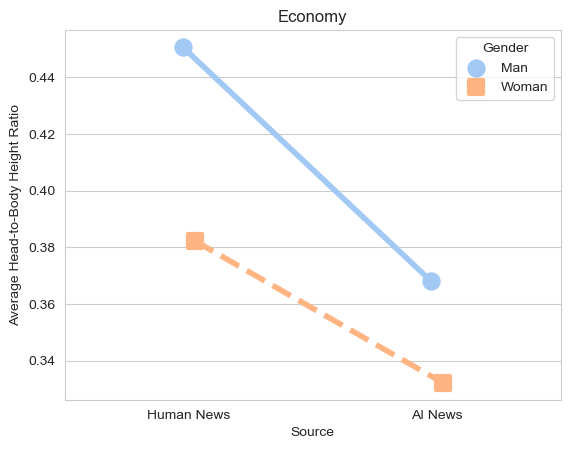

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3605484329.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


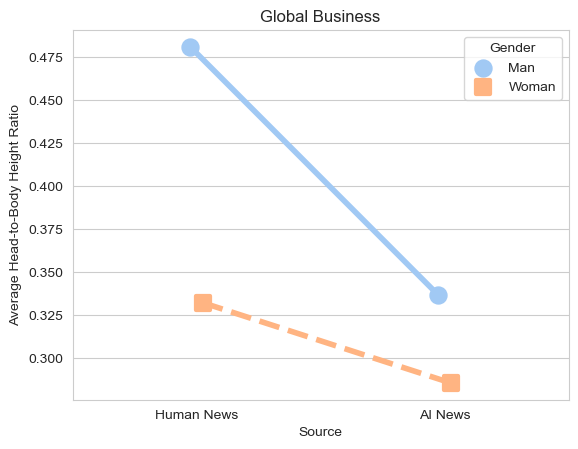

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average head-to-body height ratio for AI news data
mean_ratio_ai = df_ai.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

# Calculate the average head-to-body height ratio for human news data
mean_ratio_hm = df_hm.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

# Add a source column to differentiate between datasets
mean_ratio_ai['Source'] = 'AI News'
mean_ratio_hm['Source'] = 'Human News'

# Combine the two datasets
combined_data = pd.concat([mean_ratio_ai, mean_ratio_hm])

# Filter the sections we want to plot
sections_to_plot = ["Sports", "Science", "Technology", "Economy", "Global Business"]

# Set the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Iterate over each section to plot point plots and line plots
for section in sections_to_plot:
    subset = combined_data[combined_data['section'] == section]
    
    # Draw point plot
    subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
    
    # Draw point plot and line plot
    sns.pointplot(data=subset, x='Source', y='Head-to-Body Height Ratio', hue='Gender', palette="pastel", dodge=True, markers=["o", "s"], linestyles=["-", "--"], scale=1.5)
    
    # Add title and labels to each plot
    plt.title(f'{section}')
    plt.xlabel('Source')
    plt.ylabel('Average Head-to-Body Height Ratio')

    # Display the legend
    plt.legend(title='Gender')

    # Show each section's plot
    plt.show()


/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3478487103.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3478487103.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


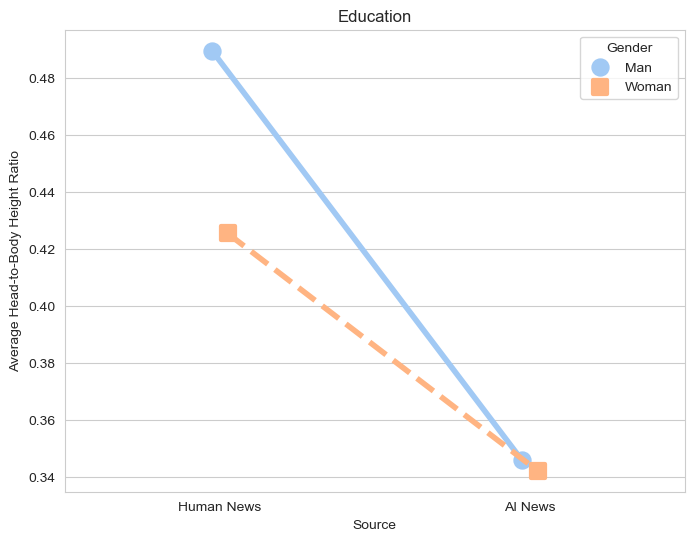

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3478487103.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3478487103.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


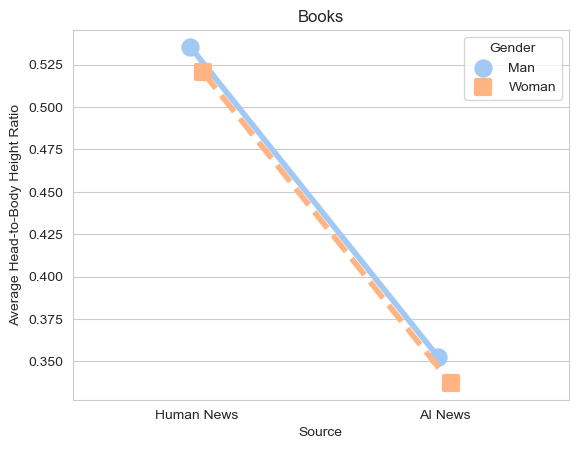

/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3478487103.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
/var/folders/q1/hl892hxx5gl9b94gl6y3mvkw0000gn/T/ipykernel_79987/3478487103.py:30: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)


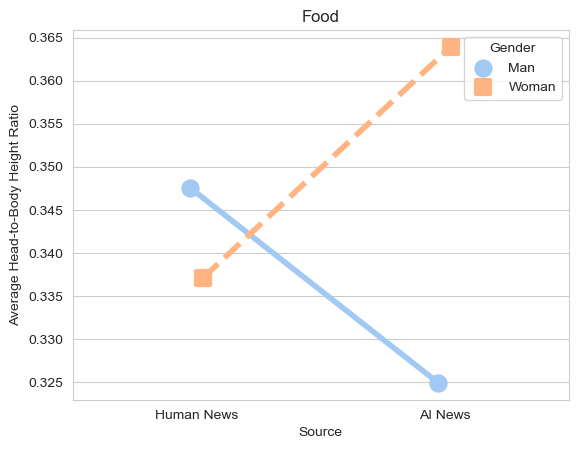

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average head-to-body height ratio for AI news data
mean_ratio_ai = df_ai.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

# Calculate the average head-to-body height ratio for human news data
mean_ratio_hm = df_hm.groupby(['section', 'Gender'])['Head-to-Body Height Ratio'].mean().reset_index()

# Add a source column to differentiate between datasets
mean_ratio_ai['Source'] = 'AI News'
mean_ratio_hm['Source'] = 'Human News'

# Combine the two datasets
combined_data = pd.concat([mean_ratio_ai, mean_ratio_hm])

# Filter the sections we want to plot
sections_to_plot = ["Education", "Books", "Food"]

# Set the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Iterate over each section to plot point plots and line plots
for section in sections_to_plot:
    subset = combined_data[combined_data['section'] == section]
    
    # Convert 'Source' to a categorical type to ensure proper ordering in the plot
    subset.loc[:, 'Source'] = pd.Categorical(subset['Source'].values, categories=['Human News', 'AI News'], ordered=True)
    
    # Draw point plot and line plot
    sns.pointplot(data=subset, x='Source', y='Head-to-Body Height Ratio', hue='Gender', palette="pastel", dodge=True, markers=["o", "s"], linestyles=["-", "--"], scale=1.5)
    
    # Add title and labels to each plot
    plt.title(f'{section}')
    plt.xlabel('Source')
    plt.ylabel('Average Head-to-Body Height Ratio')

    # Display the legend
    plt.legend(title='Gender')

    # Show each section's plot
    plt.show()
